In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
file_path = '/Users/zlatastefanovic/Desktop/Internship/BubblesDataset.xlsx'
data = pd.read_excel(file_path)

In [5]:
print(data.head())

  Type of bubble  Pressure (bar)  KPi electrolyte concentration (M)  \
0             H2               1                                2.0   
1             H2               1                                2.0   
2             H2               1                                2.0   
3             H2               2                                2.0   
4             H2               2                                2.0   

   Current density (mA/cm2)  Number of bubbles (-)  \
0                      1.25               75.33333   
1                      1.88              309.66667   
2                      2.50             1392.33333   
3                      1.25              114.00000   
4                      1.88              353.33333   

   Stdev of Number of bubbles (-)  Diameter of bubbles (mm)  \
0                         7.76745                   0.12902   
1                        34.67468                   0.08179   
2                       105.26316                   0.05580

In [6]:
O2data = data[data['Type of bubble'] == 'O2']

In [7]:
H2data = data[data['Type of bubble'] == 'H2']

In [8]:
print(H2data.head())

  Type of bubble  Pressure (bar)  KPi electrolyte concentration (M)  \
0             H2               1                                2.0   
1             H2               1                                2.0   
2             H2               1                                2.0   
3             H2               2                                2.0   
4             H2               2                                2.0   

   Current density (mA/cm2)  Number of bubbles (-)  \
0                      1.25               75.33333   
1                      1.88              309.66667   
2                      2.50             1392.33333   
3                      1.25              114.00000   
4                      1.88              353.33333   

   Stdev of Number of bubbles (-)  Diameter of bubbles (mm)  \
0                         7.76745                   0.12902   
1                        34.67468                   0.08179   
2                       105.26316                   0.05580

In [9]:
X = data[['Pressure (bar)', 'KPi electrolyte concentration (M)', 'Current density (mA/cm2)']]
y = data['Optical loss (%)']

In [10]:
XO2 = O2data[['Pressure (bar)', 'KPi electrolyte concentration (M)', 'Current density (mA/cm2)']]
yO2 = O2data['Optical loss (%)']

In [11]:
XH2 = H2data[['Pressure (bar)', 'KPi electrolyte concentration (M)', 'Current density (mA/cm2)']]
yH2 = H2data['Optical loss (%)']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
XH2_train, XH2_test, yH2_train, yH2_test = train_test_split(XH2, yH2, test_size=0.2, random_state=42)

In [14]:
XO2_train, XO2_test, yO2_train, yO2_test = train_test_split(XO2, yO2, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
modelH2 = LinearRegression()
modelH2.fit(XH2_train, yH2_train)

LinearRegression()

In [17]:
modelO2 = LinearRegression()
modelO2.fit(XO2_train, yO2_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
yO2_pred = modelO2.predict(XO2_test)

In [20]:
yH2_pred = modelH2.predict(XH2_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
mseH2 = mean_squared_error(yH2_test, yH2_pred)
r2H2 = r2_score(yH2_test, yH2_pred)

In [23]:
mseO2 = mean_squared_error(yO2_test, yO2_pred)
r2O2 = r2_score(yO2_test, yO2_pred)

In [24]:
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.471444233825511
R² Score: 0.5128505365700513


In [25]:
print(f'Mean Squared Error - H2: {mseH2}')
print(f'R² Score - H2: {r2H2}')

Mean Squared Error - H2: 7.469973877311886
R² Score - H2: -1.631248224732604


In [26]:
print(f'Mean Squared Error - O2: {mseO2}')
print(f'R² Score - O2: {r2O2}')

Mean Squared Error - O2: 3.5670599047927363
R² Score - O2: 0.701008709069747


In [27]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                   Coefficient
Pressure (bar)                       -1.828964
KPi electrolyte concentration (M)     4.290155
Current density (mA/cm2)              2.598567


In [28]:
coefficientsH2 = pd.DataFrame(modelH2.coef_, XH2.columns, columns=['Coefficient'])
print(coefficientsH2)

                                   Coefficient
Pressure (bar)                       -1.877186
KPi electrolyte concentration (M)     3.772772
Current density (mA/cm2)              3.890746


In [29]:
coefficientsO2 = pd.DataFrame(modelO2.coef_, XO2.columns, columns=['Coefficient'])
print(coefficientsO2)

                                   Coefficient
Pressure (bar)                       -1.864396
KPi electrolyte concentration (M)     4.659311
Current density (mA/cm2)              2.275173


In [30]:
XH2 = H2data[['Pressure (bar)', 'KPi electrolyte concentration (M)', 'Current density (mA/cm2)']]
yH2 = H2data['Optical loss (%)']
X_train, X_test, y_train, y_test = train_test_split(XH2, yH2, test_size=0.2, random_state=50)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
coefficients = pd.DataFrame(model.coef_, XH2.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 4.080619490916055
R² Score: 0.6981505357418075
                                   Coefficient
Pressure (bar)                       -1.691561
KPi electrolyte concentration (M)     3.773230
Current density (mA/cm2)              3.055409


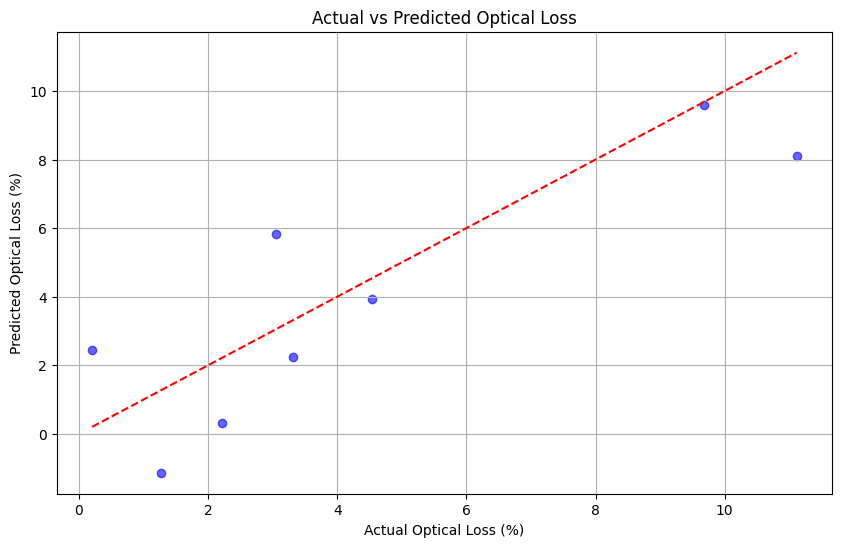

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Optical Loss')
plt.xlabel('Actual Optical Loss (%)')
plt.ylabel('Predicted Optical Loss (%)')
plt.grid()
plt.show()